# Machine Learning modeling


In [36]:
from PIL import Image
import glob
from pathlib import Path
import numpy as np
import cv2,glob
from math import cos, sin
import scipy.io as sio
from pathlib import Path
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
import joblib
import imutils



In [39]:
# import the dataset from the data_prep notebook

data = pd.read_csv('data_centered.csv')
data



,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,...,y_465,x_466,y_466,x_467,y_467,x_468,y_468,pitch,yaw,roll
0,-0.023765,0.318035,-0.006607,0.089624,-0.003660,0.126111,-0.052435,-0.284172,0.0,0.0,...,-0.621766,0.246334,-0.585165,0.847953,-0.725765,0.898422,-0.761265,-0.399231,0.018227,0.085676
1,0.135390,0.342489,0.007973,0.080386,0.173977,0.176596,0.106425,-0.167740,0.0,0.0,...,-0.343096,0.446485,-0.326326,0.887145,-0.403468,0.937679,-0.429012,0.470065,1.189533,0.300959
2,-0.034451,0.295173,-0.001236,0.081678,-0.029573,0.134064,-0.097803,-0.205510,0.0,0.0,...,-0.441704,0.067555,-0.418426,0.488717,-0.515062,0.528595,-0.545855,-0.184650,0.881137,-0.236852
3,0.206938,0.278244,0.038110,0.079997,0.136178,0.103737,-0.085015,-0.232270,0.0,0.0,...,-0.623308,0.141488,-0.583820,0.656938,-0.893207,0.691559,-0.947129,-0.175379,0.299208,-0.373374
4,0.088346,0.338087,0.018155,0.080560,0.046324,0.159416,-0.083512,-0.169726,0.0,0.0,...,-0.385039,0.070019,-0.368888,0.458136,-0.529165,0.493518,-0.545693,-0.026812,0.011965,-0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,-0.099509,0.382300,-0.012532,0.091444,-0.082647,0.161951,-0.118476,-0.237458,0.0,0.0,...,-0.521384,0.023654,-0.495524,0.468628,-0.638928,0.502156,-0.664404,-0.306358,-0.283822,0.038554
1849,-0.114417,0.343311,-0.014926,0.089406,-0.089372,0.143154,-0.106609,-0.248061,0.0,0.0,...,-0.538981,0.030159,-0.510099,0.424914,-0.634090,0.461930,-0.675646,-0.367547,-0.429723,0.122791
1850,-0.100844,0.302607,-0.022521,0.075017,-0.068619,0.153835,-0.028862,-0.183603,0.0,0.0,...,-0.308145,0.170728,-0.299684,0.540394,-0.272573,0.580638,-0.305275,-0.156035,0.567114,-0.108536
1851,-0.056898,0.364123,-0.013462,0.097607,-0.029582,0.156435,-0.064382,-0.279807,0.0,0.0,...,-0.582368,0.225926,-0.553400,0.822239,-0.653323,0.873485,-0.689914,-0.197102,-0.070430,0.105118


In [40]:
# split the data into features and labels

features = data.drop(["pitch","yaw","roll"], axis=1)
labels = data[["pitch","yaw","roll"]]

features.head(5)
labels.head(5)

,pitch,yaw,roll
0,-0.399231,0.018227,0.085676
1,0.470065,1.189533,0.300959
2,-0.184650,0.881137,-0.236852
3,-0.175379,0.299208,-0.373374
4,-0.026812,0.011965,-0.220662


In [41]:
# split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# 50% of the test data will be used for validation

features_train, features_val_test, labels_train, labels_val_test = train_test_split(features, labels,random_state=42,  test_size=0.2, shuffle=True)
features_val, features_test, labels_val, labels_test = train_test_split(features_val_test, labels_val_test,random_state=42, test_size=0.5,  shuffle=True)


In [42]:
# print the shapes of the training, validation, and test sets
print("the total number of the data sets is: ",len(data))
print("the number of the training sets is: ",len(features_train))
print("the number of the validation sets is: ",len(features_val))
print("the number of the test sets is: ",len(features_test))


the total number of the data sets is:  1853
the number of the training sets is:  1482
the number of the validation sets is:  185
the number of the test sets is:  186


In [43]:
features_train.iloc[:,2]

820     0.013446
244    -0.009785
1223   -0.012946
1636    0.040416
1079    0.012402
          ...   
1130   -0.005026
1294   -0.012434
860    -0.005586
1459   -0.004490
1126   -0.034058
Name: x_2, Length: 1482, dtype: float64

## The Traing Section <br/>



In [44]:
# Train RandomForest model_1

from sklearn.ensemble import RandomForestRegressor
model_1p = RandomForestRegressor().fit(features_train,labels_train.iloc[:,0])
model_1y = RandomForestRegressor().fit(features_train,labels_train.iloc[:,1])
model_1r = RandomForestRegressor().fit(features_train,labels_train.iloc[:,2])

print("RandomForest in pitch_val", model_1p.score(features_val, labels_val.iloc[:,0]))
print("RandomForest in yaw_val", model_1y.score(features_val, labels_val.iloc[:,1]))
print("RandomForest in roll_val", model_1r.score(features_val, labels_val.iloc[:,2]))

RandomForest in pitch_val -3.155965976773424
RandomForest in yaw_val 0.8067177763271344
RandomForest in roll_val -8.285052435396048


In [45]:
# Train decision tree model_2

from sklearn.tree import DecisionTreeRegressor
model_2p = DecisionTreeRegressor(min_samples_split=100,min_samples_leaf=100).fit(features_train,labels_train.iloc[:,0])
model_2y = DecisionTreeRegressor(min_samples_split=100,min_samples_leaf=100).fit(features_train,labels_train.iloc[:,1])
model_2r = DecisionTreeRegressor(min_samples_split=100,min_samples_leaf=100).fit(features_train,labels_train.iloc[:,2])

print("decision tree in pitch_val   ", model_2p.score(features_val, labels_val.iloc[:,0]))
print("decision tree in yaw_val ", model_2y.score(features_val, labels_val.iloc[:,1]))
print("decision tree in roll_val", model_2r.score(features_val, labels_val.iloc[:,2]))

decision tree in pitch_val    0.4329367025406935
decision tree in yaw_val  0.8505436534454333
decision tree in roll_val 0.45426952267341825


In [46]:
# Train SVM model_3

from sklearn.svm import SVR
model_3p = SVR( C=1 , kernel='rbf',epsilon=0.1).fit(features_train,labels_train.iloc[:,0])
model_3y = SVR( C=50 , kernel='rbf',epsilon=0.01).fit(features_train,labels_train.iloc[:,1])
model_3r = SVR( C=5 , kernel='rbf',epsilon=0.01).fit(features_train,labels_train.iloc[:,2])


print("svr in pitch in val", model_3p.score(features_val, labels_val.iloc[:,0]))
print("svr in yaw in val", model_3y.score(features_val, labels_val.iloc[:,1]))
print("svr in roll in val", model_3r.score(features_val, labels_val.iloc[:,2]))



# svr in pitch in val 0.7325896680448789
# svr in yaw in val 0.9205775377558519
# svr in roll in val 0.8285299833305941


svr in pitch in val 0.7324343836871883
svr in yaw in val 0.920017099544584
svr in roll in val 0.8285744910392366


In [47]:
print("svr in pitch train", model_3p.score(features_train, labels_train.iloc[:,0]))
print("svr in yaw train", model_3y.score(features_train, labels_train.iloc[:,1]))
print("svr in roll train", model_3r.score(features_train, labels_train.iloc[:,2]),"\n")


print("svr in pitch test", model_3p.score(features_test, labels_test.iloc[:,0]))
print("svr in yaw test", model_3y.score(features_test, labels_test.iloc[:,1]))
print("svr in roll test", model_3r.score(features_test, labels_test.iloc[:,2]))


svr in pitch train 0.16756489665621943
svr in yaw train 0.8881458861555046
svr in roll train 0.29779072328400036 

svr in pitch test 0.8088739724455152
svr in yaw test 0.9760960198346494
svr in roll test 0.9386611765026182


In [48]:
# XGboost
from xgboost import XGBRegressor
model_4p = XGBRegressor().fit(features_train,labels_train.iloc[:,0])
model_4y = XGBRegressor().fit(features_train,labels_train.iloc[:,1])
model_4r = XGBRegressor().fit(features_train,labels_train.iloc[:,2])

print("XGBRegressor in pitch_val", model_4p.score(features_val, labels_val.iloc[:,0]))
print("XGBRegressor in yaw_val", model_4y.score(features_val, labels_val.iloc[:,1]))
print("XGBRegressor in roll_val", model_4r.score(features_val, labels_val.iloc[:,2]))

XGBRegressor in pitch_val 0.35436581463935457
XGBRegressor in yaw_val 0.6581944260908434
XGBRegressor in roll_val -0.35512542182978657


In [49]:
# Train GradientBoosting model_5

from sklearn.ensemble import GradientBoostingRegressor
model_5p = GradientBoostingRegressor(n_estimators=300,min_samples_split=150,min_samples_leaf=150).fit(features_train,labels_train.iloc[:,0])
model_5y = GradientBoostingRegressor(n_estimators=300,min_samples_split=150,min_samples_leaf=150).fit(features_train,labels_train.iloc[:,1])
model_5r = GradientBoostingRegressor(n_estimators=300,min_samples_split=150,min_samples_leaf=150).fit(features_train,labels_train.iloc[:,2])

print("GradientBoosting in pitch_val", model_5p.score(features_val, labels_val.iloc[:,0]))
print("GradientBoosting in yaw_val", model_5y.score(features_val, labels_val.iloc[:,1]))
print("GradientBoosting in roll_val", model_5r.score(features_val, labels_val.iloc[:,2]))

GradientBoosting in pitch_val 0.6251442683906114
GradientBoosting in yaw_val 0.8874380029651676
GradientBoosting in roll_val 0.18366860957626363


In [50]:
# Train Adaboost model_6

from sklearn.ensemble import AdaBoostRegressor
model_6p = AdaBoostRegressor(n_estimators=150,learning_rate=0.005).fit(features_train,labels_train.iloc[:,0])
model_6y = AdaBoostRegressor(n_estimators=150,learning_rate=0.005).fit(features_train,labels_train.iloc[:,1])
model_6r = AdaBoostRegressor(n_estimators=150,learning_rate=0.005).fit(features_train,labels_train.iloc[:,2])

print("AdaBoost in pitch_val", model_6p.score(features_val, labels_val.iloc[:,0]))
print("AdaBoost in yaw_val", model_6y.score(features_val, labels_val.iloc[:,1]))
print("AdaBoost in roll_val", model_6r.score(features_val, labels_val.iloc[:,2]))

AdaBoost in pitch_val -15.678384550408644
AdaBoost in yaw_val 0.8489644434066385
AdaBoost in roll_val -11.767699485757943


### Grid Search 

In [51]:
# grid search svm for pitch angle

from sklearn.svm import SVR
svr_parameters = {'kernel': ['rbf'],
                  'C': np.arange(1,200,10),
                  "epsilon": np.arange(0 , 5 , .1)
                }

svm_gs = GridSearchCV (estimator = SVR() , param_grid= svr_parameters ).fit(features_train,labels_train.iloc[:,0])

svm_winner_pitch = svm_gs.best_estimator_
svm_winner_pitch

svm_winner_pitch.score(features_val, labels_val.iloc[:,0])

0.708172998049145

In [52]:
svm_gs.best_estimator_

SVR(C=21, epsilon=0.0)

In [53]:
# grid search svm for yaw angle 

from sklearn.svm import SVR
svr_parameters = {'kernel': ['rbf'],
                  'C': np.arange(1,200,10),
                  "epsilon": np.arange(0 , 5 , .1)
                }

svm_gs = GridSearchCV (estimator = SVR() , param_grid= svr_parameters ).fit(features_train,labels_train.iloc[:,1])

svm_winner_yaw = svm_gs.best_estimator_
svm_winner_yaw

svm_winner_yaw.score(features_val, labels_val.iloc[:,1])

0.9276559390986793

In [54]:
svm_gs.best_estimator_

SVR(C=11, epsilon=0.0)

In [55]:
# grid search svm for roll angle 

from sklearn.svm import SVR
svr_parameters = {'kernel': ['rbf'],
                  'C': np.arange(1,200,10),
                  "epsilon": np.arange(0 , 5 , .1)
                }

svm_gs = GridSearchCV (estimator = SVR() , param_grid= svr_parameters ).fit(features_train,labels_train.iloc[:,2])

svm_winner_roll = svm_gs.best_estimator_
svm_winner_roll

svm_winner_roll.score(features_val, labels_val.iloc[:,2])

0.6710314678972364

In [56]:
svm_gs.best_estimator_

SVR(C=41, epsilon=0.0)


# Saving The Normal Model  

In [57]:
# for test data

print("svr in pitch_test", model_3p.score(features_test, labels_test.iloc[:,0]))
print("svr in yaw_test", model_3y.score(features_test, labels_test.iloc[:,1]))
print("svr in roll_test", model_3r.score(features_test, labels_test.iloc[:,2]))

joblib.dump(model_3p, "model_3p_static.pkl")
joblib.dump(model_3y, "model_3y_static.pkl")
joblib.dump(model_3r, "model_3r_static.pkl")


svr in pitch_test 0.8088739724455152
svr in yaw_test 0.9760960198346494
svr in roll_test 0.9386611765026182


['model_3r_static.pkl']

# The Augmented Model 


### In the augmentation part the issue of the bad (roll at high angles) prediction is to be solved
### Starting by flipping the picture about the  middle vertical axis and save them 
### The yaw will be -yaw and the roll will be -roll

In [58]:
# in this function we will flip the images vertically

def flip_image_vertically(input_path, output_path):

    try:
        image = Image.open(input_path)
        flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        flipped_image.save(output_path)

    except Exception as e:
        print(f"Error: {e}")


In [62]:
# find the names of pics
names=[]
for i in glob.glob(r"C:\Users\AHMED OSAMA\Desktop\project\AFLW2000/*.mat"):
    names.append(Path(i).stem)


# flip the pics and add flipped to their name
for ii in names:
    file = f"flipped_{ii}.jpg"
    input = r"C:\Users\AHMED OSAMA\Desktop\project\AFLW2000\\"+ii+".jpg"
    output = r"C:\Users\AHMED OSAMA\Desktop\project\fliped\\"+file
    flip_image_vertically(input, output)


#find the names of the flipped pics to train the model
names_flipped=[]
for i in glob.glob(r"C:\Users\AHMED OSAMA\Desktop\project\fliped/*.jpg"):
    names_flipped.append(Path(i).stem)


### Create the data frame of the flipped pictures

In [63]:
# Initialize MediaPipe FaceMesh
# NORMALIZE THE DATA in the 3d space !

face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)
data=[]

for n in names_flipped:    
    record=[]
    image = cv2.imread(r"C:\Users\AHMED OSAMA\Desktop\project\fliped\\"+n+".jpg")
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))              # it converts the image from BGR to RGB color space
    if results.multi_face_landmarks:
        for facial_landmarks in results.multi_face_landmarks:

            nose_tip = facial_landmarks.landmark[4]                                   # the nose tip landmark is at index 4  
            chip = facial_landmarks.landmark[152]                                     # the chip landmark is at index 152

            norm_fact=np.sqrt((nose_tip.x-chip.x)**2+(nose_tip.y-chip.y)**2)

            for landmark in facial_landmarks.landmark:            
                record.append(((landmark.x - nose_tip.x)/(norm_fact)))               # Scale the x coordinate to the width of the image 
                record.append(((landmark.y - nose_tip.y)/(norm_fact)))               # Scale the y coordinate to the width of the image 
    data.append(record)                                                              # now the data is normalized to the nose tip, and scalled with the max of the width and height of the face

# data
data=pd.DataFrame(data)
data.columns = [f'x_{i//2 + 1}' if i % 2 == 0 else f'y_{i//2 + 1}' for i in range(len(data.columns))]


# store the new angle of the images in the folder
# the roll will be -roll, the yaw will be -yaw, and the pitch will be the same

angles=[]
for a in names:
    mat_file = sio.loadmat(r"C:\Users\AHMED OSAMA\Desktop\project\AFLW2000\\"+a+".mat")
    pose_para = mat_file["Pose_Para"][0][:3]
    pitch = pose_para[0]
    yaw = -pose_para[1]
    roll = -pose_para[2]
    angles.append([pitch,yaw,roll])

angles=pd.DataFrame(angles,columns=["pitch","yaw","roll"])

conc_data=pd.concat([data,angles],axis=1)
conc_data


,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,...,y_465,x_466,y_466,x_467,y_467,x_468,y_468,pitch,yaw,roll
0,0.018994,0.337474,0.004111,0.089860,-0.002657,0.126408,-0.119459,-0.273373,0.0,0.0,...,-0.686820,0.111414,-0.641805,0.684283,-0.884720,0.731793,-0.933047,-0.399231,-0.018227,-0.085676
1,-0.126767,0.357853,-0.004936,0.084889,-0.172137,0.193278,-0.174680,-0.151459,0.0,0.0,...,-0.346193,-0.300908,-0.327911,-0.259649,-0.432868,-0.269039,-0.443304,0.470065,-1.189533,-0.300959
2,0.042416,0.307063,0.003525,0.086846,0.035675,0.133891,-0.051304,-0.233541,0.0,0.0,...,-0.497493,0.221283,-0.471999,0.743553,-0.559656,0.795089,-0.596814,-0.184650,-0.881137,0.236852
3,-0.211634,0.259527,-0.039522,0.082571,-0.137579,0.102773,-0.047868,-0.278945,0.0,0.0,...,-0.543159,0.131237,-0.514343,0.553075,-0.542819,0.589534,-0.565732,-0.175379,-0.299208,0.373374
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.882169,-1.198004,1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.062426,0.346538,0.011697,0.100433,0.038295,0.156963,-0.095352,-0.270042,0.0,0.0,...,-0.630924,0.167222,-0.596172,0.744509,-0.817727,0.791777,-0.856480,-0.197102,0.070430,-0.105118
1996,0.166835,0.323585,0.007711,0.084772,0.191070,0.153824,0.118642,-0.240210,0.0,0.0,...,-0.484402,0.521968,-0.452584,1.023973,-0.461749,1.081991,-0.497099,-0.232617,1.418751,-0.175960
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.447955,-1.431267,1.509418
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420465,1.191176,-0.451515


In [64]:
conc_data.dropna(inplace=True)
conc_data.reset_index(drop=True,inplace=True)
conc_data

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,...,y_465,x_466,y_466,x_467,y_467,x_468,y_468,pitch,yaw,roll
0,0.018994,0.337474,0.004111,0.089860,-0.002657,0.126408,-0.119459,-0.273373,0.0,0.0,...,-0.686820,0.111414,-0.641805,0.684283,-0.884720,0.731793,-0.933047,-0.399231,-0.018227,-0.085676
1,-0.126767,0.357853,-0.004936,0.084889,-0.172137,0.193278,-0.174680,-0.151459,0.0,0.0,...,-0.346193,-0.300908,-0.327911,-0.259649,-0.432868,-0.269039,-0.443304,0.470065,-1.189533,-0.300959
2,0.042416,0.307063,0.003525,0.086846,0.035675,0.133891,-0.051304,-0.233541,0.0,0.0,...,-0.497493,0.221283,-0.471999,0.743553,-0.559656,0.795089,-0.596814,-0.184650,-0.881137,0.236852
3,-0.211634,0.259527,-0.039522,0.082571,-0.137579,0.102773,-0.047868,-0.278945,0.0,0.0,...,-0.543159,0.131237,-0.514343,0.553075,-0.542819,0.589534,-0.565732,-0.175379,-0.299208,0.373374
4,-0.089576,0.341644,-0.018577,0.079776,-0.047016,0.161691,-0.026447,-0.190719,0.0,0.0,...,-0.316583,0.167093,-0.310176,0.571823,-0.295263,0.609680,-0.299884,-0.026812,-0.011965,0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0.120552,0.346557,0.015180,0.087250,0.094250,0.144739,-0.038505,-0.237753,0.0,0.0,...,-0.538924,0.259404,-0.509109,0.823110,-0.670993,0.869069,-0.714804,-0.367547,0.429723,-0.122791
1840,-0.079669,0.326395,-0.001233,0.082436,-0.092029,0.135563,-0.124907,-0.246859,0.0,0.0,...,-0.512609,-0.040736,-0.482703,0.254204,-0.504911,0.274283,-0.547370,-0.156035,-0.567114,0.108536
1841,0.062426,0.346538,0.011697,0.100433,0.038295,0.156963,-0.095352,-0.270042,0.0,0.0,...,-0.630924,0.167222,-0.596172,0.744509,-0.817727,0.791777,-0.856480,-0.197102,0.070430,-0.105118
1842,0.166835,0.323585,0.007711,0.084772,0.191070,0.153824,0.118642,-0.240210,0.0,0.0,...,-0.484402,0.521968,-0.452584,1.023973,-0.461749,1.081991,-0.497099,-0.232617,1.418751,-0.175960


In [65]:
conc_data.to_csv(r"C:\Users\AHMED OSAMA\Desktop\project\fliped_data.csv",index=False)

In [66]:
data_1=pd.read_csv(r"C:\Users\AHMED OSAMA\Desktop\project\data_centered.csv")
data_2=pd.read_csv(r"C:\Users\AHMED OSAMA\Desktop\project\fliped_data.csv")
data = pd.concat([data_1, data_2], axis=0, ignore_index=True)
data.reset_index(drop=True,inplace=True)
data.to_csv(r"C:\Users\AHMED OSAMA\Desktop\project\final_data.csv",index=False)

### The Augmented DataFrame

In [67]:
data=pd.read_csv(r"C:\Users\AHMED OSAMA\Desktop\project\final_data.csv")
data

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,...,y_465,x_466,y_466,x_467,y_467,x_468,y_468,pitch,yaw,roll
0,-0.023765,0.318035,-0.006607,0.089624,-0.003660,0.126111,-0.052435,-0.284172,0.0,0.0,...,-0.621766,0.246334,-0.585165,0.847953,-0.725765,0.898422,-0.761265,-0.399231,0.018227,0.085676
1,0.135390,0.342489,0.007973,0.080386,0.173977,0.176596,0.106425,-0.167740,0.0,0.0,...,-0.343096,0.446485,-0.326326,0.887145,-0.403468,0.937679,-0.429012,0.470065,1.189533,0.300959
2,-0.034451,0.295173,-0.001236,0.081678,-0.029573,0.134064,-0.097803,-0.205510,0.0,0.0,...,-0.441704,0.067555,-0.418426,0.488717,-0.515062,0.528595,-0.545855,-0.184650,0.881137,-0.236852
3,0.206938,0.278244,0.038110,0.079997,0.136178,0.103737,-0.085015,-0.232270,0.0,0.0,...,-0.623308,0.141488,-0.583820,0.656938,-0.893207,0.691559,-0.947129,-0.175379,0.299208,-0.373374
4,0.088346,0.338087,0.018155,0.080560,0.046324,0.159416,-0.083512,-0.169726,0.0,0.0,...,-0.385039,0.070019,-0.368888,0.458136,-0.529165,0.493518,-0.545693,-0.026812,0.011965,-0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,0.120552,0.346557,0.015180,0.087250,0.094250,0.144739,-0.038505,-0.237753,0.0,0.0,...,-0.538924,0.259404,-0.509109,0.823110,-0.670993,0.869069,-0.714804,-0.367547,0.429723,-0.122791
3693,-0.079669,0.326395,-0.001233,0.082436,-0.092029,0.135563,-0.124907,-0.246859,0.0,0.0,...,-0.512609,-0.040736,-0.482703,0.254204,-0.504911,0.274283,-0.547370,-0.156035,-0.567114,0.108536
3694,0.062426,0.346538,0.011697,0.100433,0.038295,0.156963,-0.095352,-0.270042,0.0,0.0,...,-0.630924,0.167222,-0.596172,0.744509,-0.817727,0.791777,-0.856480,-0.197102,0.070430,-0.105118
3695,0.166835,0.323585,0.007711,0.084772,0.191070,0.153824,0.118642,-0.240210,0.0,0.0,...,-0.484402,0.521968,-0.452584,1.023973,-0.461749,1.081991,-0.497099,-0.232617,1.418751,-0.175960


## The Augmented Data set

In [68]:
# split the data into features and labels

features = data.drop(["pitch","yaw","roll"], axis=1)
labels = data[["pitch","yaw","roll"]]

# split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# 50% of the test data will be used for validation

features_train, features_val_test, labels_train, labels_val_test = train_test_split(features, labels, test_size=0.2, random_state=20, shuffle=True)
features_val, features_test, labels_val, labels_test = train_test_split(features_val_test, labels_val_test, test_size=0.5, random_state=20, shuffle=True)

# print the shapes of the training, validation, and test sets
print("the total number of the data sets is: ",len(data))
print("the number of the training sets is: ",len(features_train))
print("the number of the validation sets is: ",len(features_val))
print("the number of the test sets is: ",len(features_test))


the total number of the data sets is:  3697
the number of the training sets is:  2957
the number of the validation sets is:  370
the number of the test sets is:  370


In [69]:
# Train SVM model_3
from sklearn.svm import SVR
model_3p = SVR( C=35 , kernel='rbf',epsilon=0.02).fit(features_train,labels_train.iloc[:,0])
model_3y = SVR( C=50 , kernel='rbf',epsilon=0.01).fit(features_train,labels_train.iloc[:,1])
model_3r = SVR( C=5 , kernel='rbf',epsilon=0.01).fit(features_train,labels_train.iloc[:,2])


print("svr in pitch_val", model_3p.score(features_val, labels_val.iloc[:,0]))
print("svr in yaw_val", model_3y.score(features_val, labels_val.iloc[:,1]))
print("svr in roll_val", model_3r.score(features_val, labels_val.iloc[:,2]))


#without augmentation
# svr in pitch in val 0.7185475800449646
# svr in yaw in val 0.9537258642001768
# svr in roll in val 0.8398701746091136

#with Augmentation 
# svr in pitch_val 0.7985039468959957
# svr in yaw_val 0.9685558838710668
# svr in roll_val 0.9043747686099664

svr in pitch_val 0.7982720902340503
svr in yaw_val 0.9686763668227865
svr in roll_val 0.9042747127956795


In [70]:
print("svr in pitch", model_3p.score(features_test, labels_test.iloc[:,0]))
print("svr in yaw", model_3y.score(features_test, labels_test.iloc[:,1]))
print("svr in roll", model_3r.score(features_test, labels_test.iloc[:,2]))

#without augmentation
# svr in pitch 0.8151658402073909
# svr in yaw 0.9643184487904485
# svr in roll 0.9248483938242036

svr in pitch 0.6449334321840865
svr in yaw 0.9333204480286609
svr in roll 0.6178304034009614


In [71]:
joblib.dump(model_3p, "AUG_model_3p_static.pkl")
joblib.dump(model_3y, "AUG_model_3y_static.pkl")
joblib.dump(model_3r, "AUG_model_3r_static.pkl")

['AUG_model_3r_static.pkl']

# Deployment Of The ML Model

## Select the Normal angles models or the Augmented models 

In [4]:
# loading the Augmented models
# model_pitch = joblib.load("AUG_model_3p_static.pkl")
model_roll = joblib.load("AUG_model_3r_static.pkl")
model_yaw = joblib.load("AUG_model_3y_static.pkl")

# loading the models
model_pitch = joblib.load("model_3p_static.pkl")
# model_roll = joblib.load("model_3r_static.pkl")
# model_yaw = joblib.load("model_3y_static.pkl")



In [8]:
#incase any code crashed run this cell the camera will be released 

video_capture.release()
cv2.destroyAllWindows()

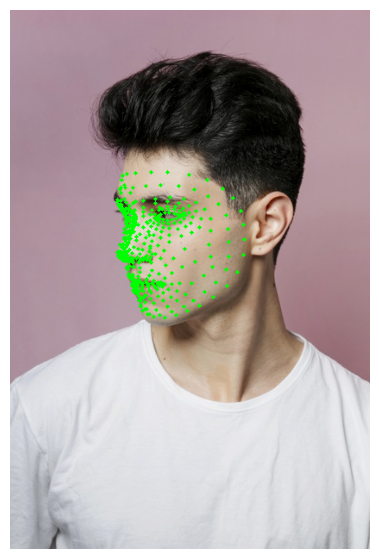

In [32]:
# the following code is  for visualizing the facial landmarks in a picture


face_mesh = mp.solutions.face_mesh.FaceMesh()
frame = cv2.imread(r"test.jpg")
output_path = "test_landmarks.jpg"
results = face_mesh.process(frame)

if results.multi_face_landmarks:
    for facial_landmarks in results.multi_face_landmarks:
        for landmark in facial_landmarks.landmark:
            x = int(landmark.x * frame.shape[1])
            y = int(landmark.y  * frame.shape[0])
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

plt.figure(figsize=(5,7))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
cv2.imwrite(output_path, frame)
plt.show()
cv2.destroyAllWindows()


# The following code is  for visualizing the facial landmarks in real time


In [11]:
# the following code is  for visualizing the facial landmarks in real time


face_mesh = mp.solutions.face_mesh.FaceMesh()
video_capture = cv2.VideoCapture(0)

while True:
    
    ret, frame = video_capture.read()
    frame = cv2.flip(frame, 1)
    results = face_mesh.process(frame)

    if results.multi_face_landmarks:
        for facial_landmarks in results.multi_face_landmarks:
            for landmark in facial_landmarks.landmark:
                x = int(landmark.x * frame.shape[1])
                y = int(landmark.y  * frame.shape[0])
                cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
                cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


In [ ]:
# the following code is  for visualizing the facial landmarks for imported video


face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False)
video_capture = cv2.VideoCapture(r"video_4.mp4")

fourcc = cv2.VideoWriter_fourcc(*'XVID')  
output_path = "output_landmarks.mp4"  
frame_width, frame_height = int(video_capture.get(3)), int(video_capture.get(4))
out = cv2.VideoWriter(output_path, fourcc, 17, (frame_width, frame_height))


while True:
    
    ret, frame = video_capture.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    results = face_mesh.process(frame)

    if results.multi_face_landmarks:
        for facial_landmarks in results.multi_face_landmarks:
            for landmark in facial_landmarks.landmark:
                x = int(landmark.x * frame.shape[1])
                y = int(landmark.y  * frame.shape[0])
                cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
                cv2.imshow('Video', frame)
            out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
out.release()
cv2.destroyAllWindows()


# The folowing code is for visualizing the 3D axis in real time

In [9]:
# the folowing code is for visualizing the 3D axis in real time


def draw_axis(img, pitch,yaw,roll, x,y, size = 100):

    yaw = -yaw
    tdx = x
    tdy = y
    
    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy


    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img



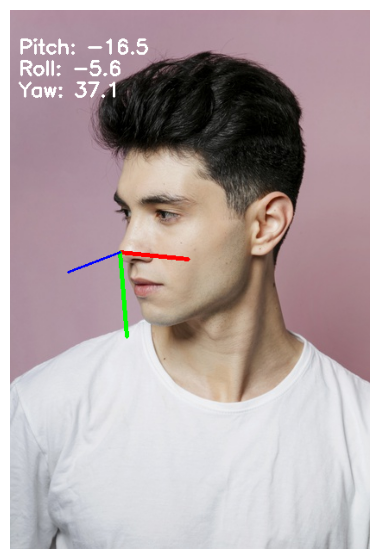

In [31]:

# the following code is for drawing the axis of the face

face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)   # for dealing with pictures it is recommended to make the static_image_mode=True

frame = cv2.imread(r"test.jpg")
output_path = "test_axis.jpg" 

results = face_mesh.process(frame)

record=[]

if results.multi_face_landmarks:

    for facial_landmarks in results.multi_face_landmarks:

        nose_tip = facial_landmarks.landmark[4]                             
        chin = facial_landmarks.landmark[152]                                     
        norm_fact=np.sqrt((nose_tip.x-chin.x)**2+(nose_tip.y-chin.y)**2)

        for landmark in facial_landmarks.landmark:            
            record.append(((landmark.x - nose_tip.x)/(norm_fact)))  
            record.append(((landmark.y - nose_tip.y)/(norm_fact)))  

        record=np.array(record).reshape(1,-1)
        record=pd.DataFrame(record)
        record.columns = [f'x_{i//2 + 1}' if i % 2 == 0 else f'y_{i//2 + 1}' for i in range(len(record.columns))]
        pred_p=model_pitch.predict(record)
        pred_r=model_roll.predict(record)
        pred_y=model_yaw.predict(record)

        cv2.putText(frame, "Pitch: "+str(round(pred_p[0]*180/3.14 ,1)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255), 2) 
        cv2.putText(frame, "Roll: "+str(round(pred_r[0]*180/3.14 ,1)), (10, 75), cv2.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255), 2)
        cv2.putText(frame, "Yaw: "+str(round(pred_y[0]*180/3.14 ,1)), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, .75, (255, 255, 255), 2)


        nose_tip_x = facial_landmarks.landmark[4].x*frame.shape[1]
        nose_tip_y = facial_landmarks.landmark[4].y*frame.shape[0]

        the_image=draw_axis(frame,pred_p[0],pred_y[0],pred_r[0], nose_tip_x , nose_tip_y)

        plt.figure(figsize=(5,7))
        plt.imshow(cv2.cvtColor(the_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        cv2.imwrite(output_path, the_image)
        plt.show()


cv2.destroyAllWindows()



# The Code of drawing the pose axes in the real time

In [33]:
# the following code is for drawing the axis of the face 


face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False)   # for dealing with videos it is recommended to make the static_image_mode=False
video_capture = cv2.VideoCapture(0)
video_capture.set(cv2.CAP_PROP_FPS, 25)

while True:
    
    ret, frame = video_capture.read()
    frame = cv2.flip(frame, 1)
    results = face_mesh.process(frame)
    record=[]

    if results.multi_face_landmarks:

        for facial_landmarks in results.multi_face_landmarks:

            nose_tip = facial_landmarks.landmark[4]                             
            chin = facial_landmarks.landmark[152]                                     
            norm_fact=np.sqrt((nose_tip.x-chin.x)**2+(nose_tip.y-chin.y)**2)

            for landmark in facial_landmarks.landmark:            
                record.append(((landmark.x - nose_tip.x)/(norm_fact)))      
                record.append(((landmark.y - nose_tip.y)/(norm_fact))) 

            record=np.array(record).reshape(1,-1)

            record=pd.DataFrame(record)
            record.columns = [f'x_{i//2 + 1}' if i % 2 == 0 else f'y_{i//2 + 1}' for i in range(len(record.columns))]

            pred_p=model_pitch.predict(record)
            pred_r=model_roll.predict(record)
            pred_y=model_yaw.predict(record)

            cv2.putText(frame, "Pitch: "+str(round(pred_p[0]*180/3.14 ,1)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) 
            cv2.putText(frame, "Roll: "+str(round(pred_r[0]*180/3.14 ,1)), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, "Yaw: "+str(round(pred_y[0]*180/3.14 ,1)), (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            nose_tip_x = facial_landmarks.landmark[4].x*frame.shape[1]
            nose_tip_y = facial_landmarks.landmark[4].y*frame.shape[0]

            cv2.imshow("LIVE",draw_axis(frame,pred_p[0],pred_y[0],pred_r[0], nose_tip_x , nose_tip_y))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


# The final code of the project drawing the pose axes in the video imported

In [30]:
# the following code is for drawing the axes of the face and recording the video

face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False)   # for dealing with videos it is recommended to make the static_image_mode=False

video_capture = cv2.VideoCapture(r"video_4.mp4")
output_path = "output_augmented.mp4" 

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
fps = video_capture.get(cv2.CAP_PROP_FPS)
frame_width, frame_height = int(video_capture.get(3)), int(video_capture.get(4))

# change the size of the output video uncomment if you wish 

# width=1000                                                                         
# frame_height=int(frame_height*width/frame_width)
# frame_width=width

out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while True:

    ret, frame = video_capture.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=frame_width)

    results = face_mesh.process(frame)
    record=[]

    if results.multi_face_landmarks:

        for facial_landmarks in results.multi_face_landmarks:

            nose_tip = facial_landmarks.landmark[4]                             
            chin = facial_landmarks.landmark[152]                                     

            norm_fact=np.sqrt((nose_tip.x-chin.x)**2+(nose_tip.y-chin.y)**2)

            for landmark in facial_landmarks.landmark:            
                record.append(((landmark.x - nose_tip.x)/(norm_fact)))  
                record.append(((landmark.y - nose_tip.y)/(norm_fact)))  

            record=np.array(record).reshape(1,-1)
            record=pd.DataFrame(record)
            record.columns = [f'x_{i//2 + 1}' if i % 2 == 0 else f'y_{i//2 + 1}' for i in range(len(record.columns))]

            pred_p=model_pitch.predict(record)
            pred_r=model_roll.predict(record)
            pred_y=model_yaw.predict(record)

            cv2.putText(frame, "Pitch: "+str(round(pred_p[0]*180/3.14 ,1)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) 
            cv2.putText(frame, "Roll: "+str(round(pred_r[0]*180/3.14 ,1)), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, "Yaw: "+str(round(pred_y[0]*180/3.14 ,1)), (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, "Augmented Model", (10, 650), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

            nose_tip_x = facial_landmarks.landmark[4].x*frame.shape[1]
            nose_tip_y = facial_landmarks.landmark[4].y*frame.shape[0]

            cv2.imshow("LIVE",draw_axis(frame,pred_p[0],pred_y[0],pred_r[0], nose_tip_x , nose_tip_y))
            out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
video_capture.release()
out.release()
cv2.destroyAllWindows()



## Conclusion

### The Augmented Model showed a better performance in some "Yaw" and "Roll" angles 
### The model can predict accurately the face pose 
### all the videos are found in the following link 

### https://drive.google.com/drive/folders/1qZvU-MciPstoa7E4tNcJrG2Jy9EXnrYd?usp=drive_link




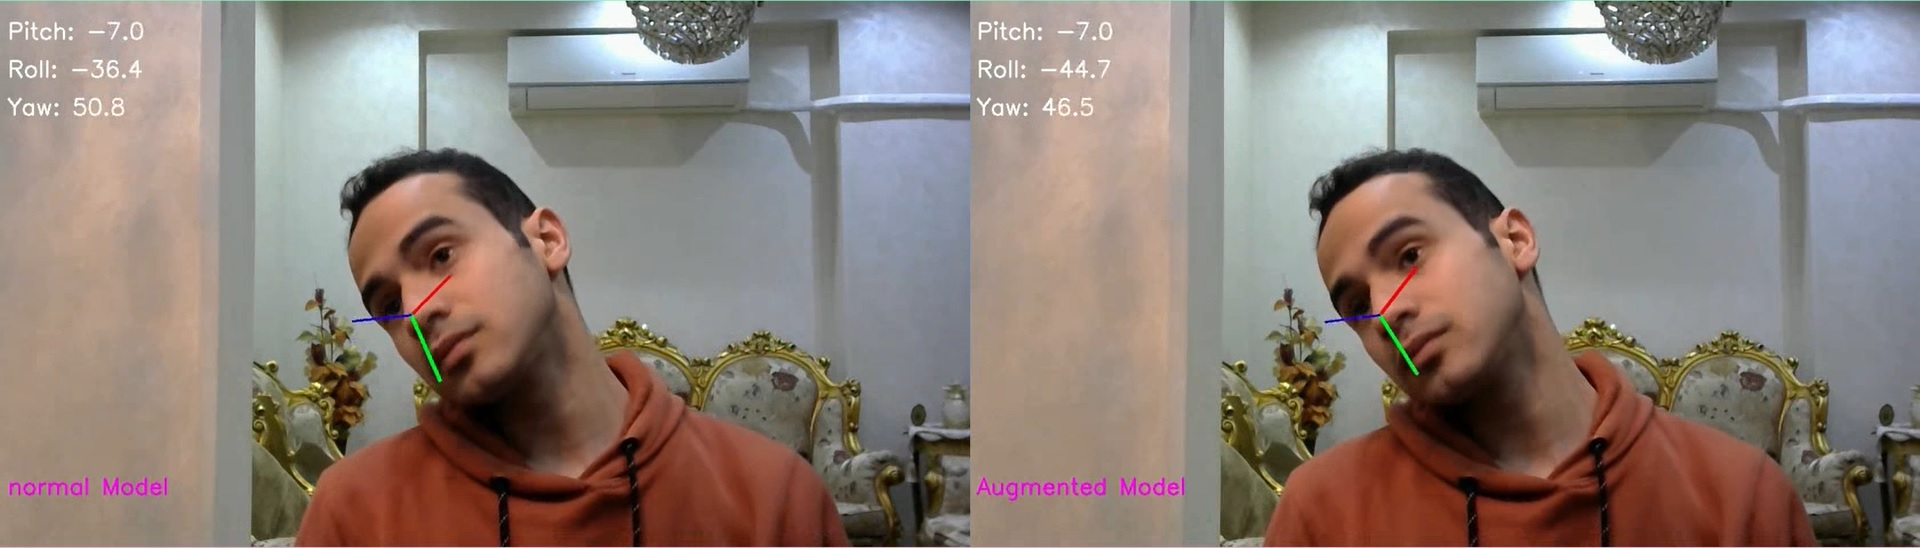



### Notice the green line (roll angle)

####



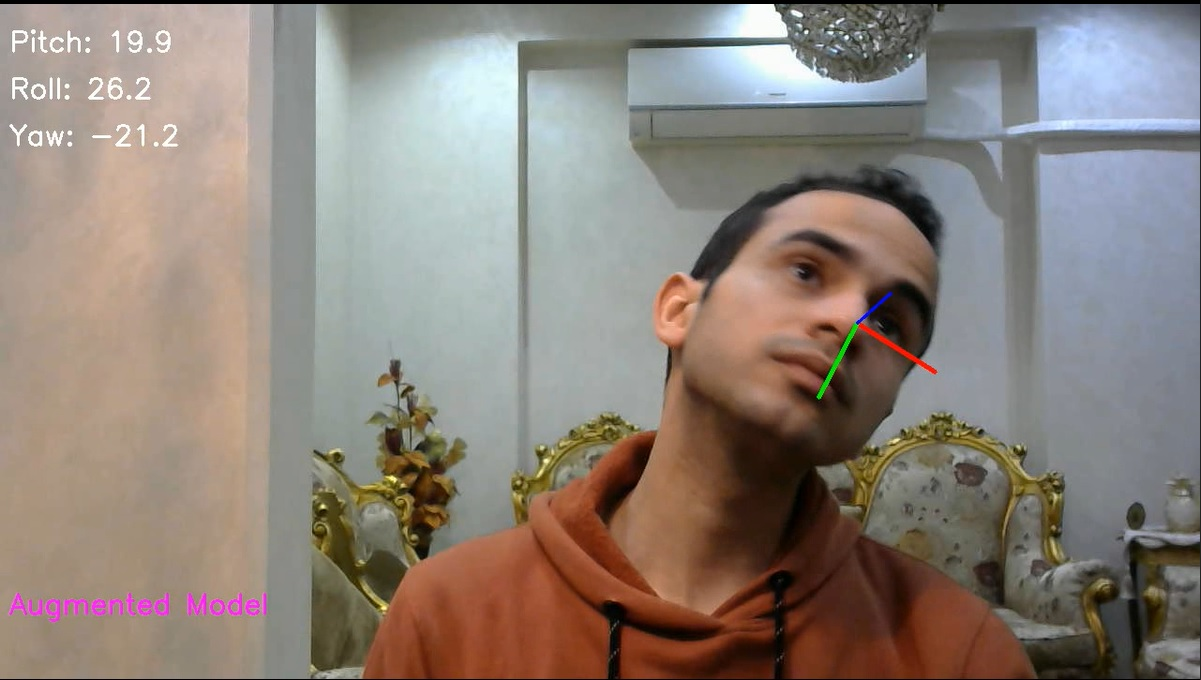






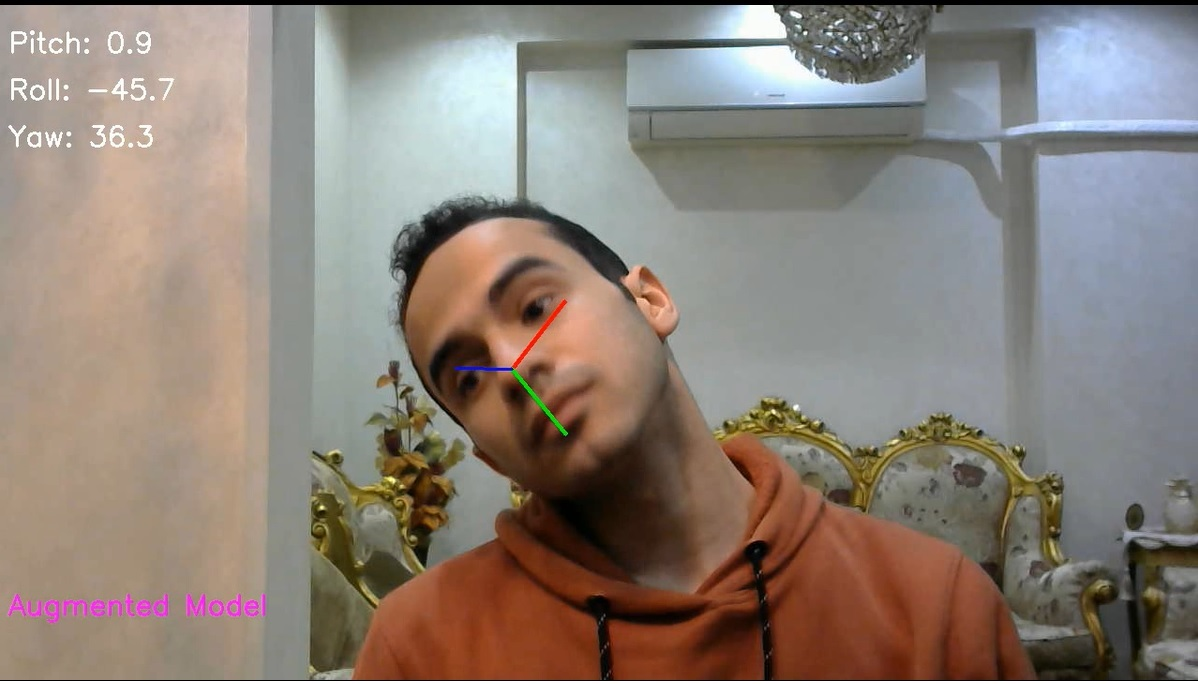

